<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Time-Series-Analysis/blob/master/Deep_Learning_Stock_Prediction_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name -M.R.Ragavendhra Ramanan**





#**Task Overview**

* In this task we are going to predict the **Opening** price of stocks for the which the **market cap** is over **2 Billion** using deep learning models.
* For this task ,the Convolutional Neural Networks (CNN) are used.
* CNN is better than LSTM and RNN because the training time is short.
* Also,CNN is used since it performs best in finding out the spatial correlations between the data.
* The Stock used for training is **Microsoft** since its market cap is over **1.58 trillion**
* After training we test our model on **NYSE** and on **Apple** stocks.
*The Evaluation metric is **Mean Absolute Percentage Error** (MAPE)


#**Methodology to create a model**

* First the **Microsoft** Dataset is imported from the **csv** file.
* Then the Dataset is splitted into training and testing datasets.
* The Training Dataset is then transformed into scaled values using **Robust Scaler**.
* The **Robust Scaler** is used instead of **MinMaxScaler** since it is more robust to outliers.
* It scales down the value based on Inter-Quartile Range.
* The Training dataset is then windowed over the 7 days i.e)From current day to 7th day from the current day.
* Later the Dataset is fed into the CNN model.
* It is then tested for prediction on Test Dataset.
* In order to check our model performance over out-of sample datas ,our model is tested on **NYSE** and **Apple** dataset. 

#**Training on Microsoft**

* Train the CNN model on Microsoft data.
* The dataset contains the daily prices of the stocks.

**Import relevant libraries**

In [1]:
import  numpy as np#Used for fast mathematical function processing
import pandas as pd#Used for Datascience processes to make indexing easy
import matplotlib.pyplot as plt#Machine Learning Library to create plots and data visualizations
import tensorflow as tf#It is an end-to end Machine learning library used to develop,train and deploy models. 
from tensorflow import keras#It is a neural network library which is more user friendly
from sklearn.preprocessing import RobustScaler#used to scale the values based on Inter-Quartile range(25%to75%)

**Load Dataset**

In [3]:
#The dataset is given in csv format,This line is used to import the csv file containing Microsoft stock values
#Here 'data' is the Dataframe
data=pd.read_csv('mic.csv',index_col='Date',parse_dates=['Date'])

In [4]:
#print first  5 rows
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-12,24.420000,24.680000,24.360001,24.490000,19.346718,70240500
2010-08-13,24.350000,24.670000,24.240000,24.400000,19.275618,45263500
2010-08-16,24.360001,24.610001,24.299999,24.500000,19.354610,40909700
2010-08-17,24.709999,24.959999,24.600000,24.709999,19.624645,52912600
2010-08-18,24.680000,24.950001,24.410000,24.820000,19.712004,46818900


**Explanation of Dataset**

* **Date** -Index of the dataset containing the dates.
* **Open** -It contains the daily opening price of stock
* **High**-It contains the Highest price reached on the particular day.
* **Low**-It contains the Lowest Price reached on the particular day.
* **Close**-It contains the daily closing price of stock.
* **Adj Close**-The adjusted closing price shows the stock's value after posting a dividend
* **Volume**-Volume is the number of shares of a security traded during a given period of time.

In [5]:
#print last 5 rows
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-05,214.899994,215.000000,211.570007,212.940002,212.940002,28858600
2020-08-06,212.339996,216.369995,211.550003,216.350006,216.350006,32656800
2020-08-07,214.850006,215.699997,210.929993,212.479996,212.479996,27789600
2020-08-10,211.669998,211.880005,206.350006,208.250000,208.250000,36716500
2020-08-11,207.160004,207.649994,203.139999,203.380005,203.380005,36367300


In [6]:
#creating training and testing time
train_time=int(len(data)*0.7)#70% of the length of original dataset is taken as training time
test_time=len(data)-train_time#Remaining 30% of the length of original dataset is taken as testing time

In [7]:
#spliting of original dataset into training dataset and testing dataset
x_train=data[:train_time]#The original dataset starting from 0 to training time is taken as training dataset
x_test=data[train_time:]# The original dataset starting after the training time is taken as testing dataset

In [8]:
#Get the shape and type of train_data
print("Shape of train data - {}".format(x_train.shape))#print the shape of training data
print("Type of train data - {}".format(type(x_train)))#print the shape of testing data.


Shape of train data - (1761, 6)
Type of train data - <class 'pandas.core.frame.DataFrame'>


In [9]:
#convert the scale on inter-quartile range
scaler=RobustScaler()#create object for class Robust Scaler.
#It is used to scale the values and is robust to outliers as it eliminates outliers by taking 25% to 75% of data
x_scaled=scaler.fit_transform(x_train)#It is used to transform the training dataset to scaled values.

In [10]:
x=[]#empty list
y=[]#empty list
#here the features are first 7 days and output to be predicted is 8th day
for i in range(7,x_scaled.shape[0]):#looping on the dataset for 7 days
  x.append(x_scaled[i-7:i])#appending first 7 days windowed list to x as features. 
  y.append(x_scaled[i,0])#appending only the opening price of first 7 days windowed list to y as target labels.

In [11]:
#convert into numpy array
x_window_set,y_window_set=np.array(x),np.array(y)#convert the list x and y to numpy arrays

#**Define the model** 

* **CNN** is used.
* A typical CNN consist of convolution layer, pooling layer,       activation layer and output layer.
* Here **Conv1D** is used since it enables movement of price is only one direction ie.)**Price**.
* Padding used is **Same** so that the kernel moves over entire inputs given.
* Activation used is **Relu** since it introduces non-linearity and also it provides regularizing effect since during backpropogation the weights less than zero are turned to Zero thus avoiding overfitting.
* **Average pooling** is used since Maxpooling tend to miss lot of information  between the data.


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=6, kernel_size=30,
                      strides=1, padding="same",
                      activation="relu",
                      input_shape=[x_window_set.shape[1], 6]),#First convolutional layer
  tf.keras.layers.Activation('relu'),#First activation layer
  tf.keras.layers.AveragePooling1D(pool_size=2, strides=None, padding="valid"),#First pooling layer

  tf.keras.layers.Conv1D(filters=4, kernel_size=15,
                      strides=1, padding="same",
                      activation="relu"),#second convolutional layer
  tf.keras.layers.Activation('relu'),#second activation layer
  tf.keras.layers.AveragePooling1D(pool_size=2, strides=None, padding="valid"),#second pooling layer

  tf.keras.layers.Conv1D(filters=2, kernel_size=7,
                      strides=1, padding="same",
                      activation="relu"),#third convolutional layer
  tf.keras.layers.Activation('relu'),#third activation layer
  tf.keras.layers.AveragePooling1D(pool_size=1, strides=None, padding="valid"),#third pooling layer

  tf.keras.layers.Flatten(),#First flatten layer.It is used to flatten the matrix of data.
  tf.keras.layers.Dense(32),#First dense layer.
  tf.keras.layers.Dense(1)#Output layer

  
])


In [13]:
model.summary()#To show the layers, output shape and parameters used.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 6)              1086      
_________________________________________________________________
activation (Activation)      (None, 7, 6)              0         
_________________________________________________________________
average_pooling1d (AveragePo (None, 3, 6)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 4)              364       
_________________________________________________________________
activation_1 (Activation)    (None, 3, 4)              0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 1, 4)              0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 2)              5

In [14]:
model.compile(loss='mse',#loss used is mean squared error.
              optimizer='adam',#Optimizer used is Adam,since it smooths the oscillation of gradient and can self-tune the learning rate
              metrics=["mae"])#metric is mean absolute error.
model.fit(x_window_set,y_window_set, epochs=100,batch_size=32 )#the model is run on scaled training data
#It is run for 100 epochs with batch size of 32 .

Epoch 1/100
55/55 [==============================] - 0s 2ms/step - loss: 0.2960 - mae: 0.4497
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0452 - mae: 0.1642
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1149
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0094 - mae: 0.0786
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0465
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0310
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0271
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0257
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0243
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0266
Epoch 11/100
55/55 [==============================] - 0s 2m

#**Prediction on the test dataset**

In [15]:
x_real_test=data[train_time-7:]#create dataset
x_a_real_test=np.array(x_real_test)#convert into numpy array

In [16]:
x_t_scaled=scaler.transform(x_a_real_test)#scale the values using the Robust scaler parameters .

In [17]:
x_t=[]#empty list
y_t=[]#empty list

In [19]:
#here the features are first 7 days and output to be predicted is 8th day
for i in range(7,x_t_scaled.shape[0]):#looping on the dataset for 7 days
  x_t.append(x_t_scaled[i-7:i])#appending first 7 days windowed list to x_t as features. 
  y_t.append(x_t_scaled[i,0])#appending only the opening price of first 7 days windowed list to y_t as target labels.

In [20]:
x_test_window_set,y_test_window_set=np.array(x_t),np.array(y_t)#convert the list to numpy array

In [21]:
predicted_value=model.predict(x_test_window_set)#Predict the value of test dataset features

**Mean Absolute percentage error**
* $MAPE=\sum_\frac{Actual-Forecast}{Forecast}$

In [22]:
#calculating Mean Absolute Percentage error (MAPE)
m = tf.keras.metrics.MeanAbsolutePercentageError()#initialize the MAPE class.
m.update_state(y_test_window_set,predicted_value)#calculate MAPE on Actual testing values and forecasted values
m.result().numpy()#print the result

1.8217003

In [23]:
time=np.arange(1,2518)#create a range of numbers from 1 to 2518 

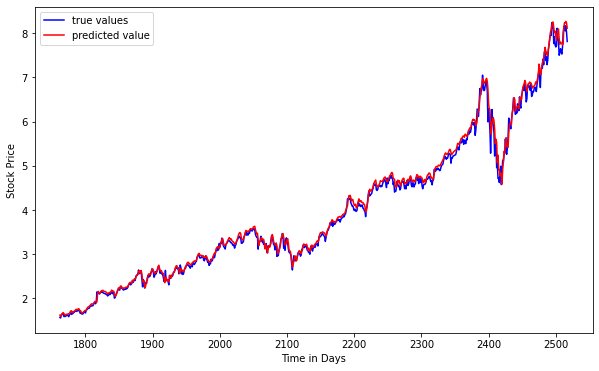

In [25]:
#visualizing the results
plt.figure(figsize=(10,6))#Set the figure size
plt.plot(time[1761:],y_test_window_set,color='blue',label="true values")#Plot the true testing value in blue
plt.plot(time[1761:],predicted_value,color='red',label='predicted value')#Plot the predicted value in red
plt.xlabel('Time in Days')#set label of x as Time
plt.ylabel('Stock Price')#set label of y as Value
plt.legend()#show the labels
plt.show()#show the plot

* **x-axis** contains time in days.
* **y-axis** contains stock price
* The **Blue** and **Red** line almost overlaps each other .
* From, the visualization we can see that our model has performed well since it has captured almost all the data .

#**Prediction on Out of Samples dataset[Different stock market]**

* The **Microsoft** stocks are found in **NASDAQ** stockmarket, thus **NASDAQ** stock market would have correlations with the **Microsoft**.
* Hence we are testing our model on **NYSE** stock market,since  **NYSE** stock markets vary from **NASDAQ**.


#**Prediction on NYSE Dataset**

In [26]:
#import NYSE dataset from csv file
data1=pd.read_csv('nyse.csv',index_col='Date',parse_dates=['Date'])

In [27]:
x_t_scaled1=scaler.transform(data1)#scale the values by Robust Scaler

In [28]:
x_t1=[]#empty list
y_t1=[]#empty list

In [29]:
#here the features are first 7 days and output to be predicted is 8th day
for i in range(7,x_t_scaled1.shape[0]):#looping on the dataset for 7 days
  x_t1.append(x_t_scaled1[i-7:i])#appending first 7 days windowed list to x_t1 as features.
  y_t1.append(x_t_scaled1[i,0])#appending only the opening price of first 7 days windowed list to y_t1 as target labels.

In [30]:
x_test_window_set1,y_test_window_set1=np.array(x_t1),np.array(y_t1)#convert the list to numpy array

In [31]:
#predicted value
predicted_value1=model.predict(x_test_window_set1)#Predict the value of  dataset features

In [32]:
#calculating MAPE
m = tf.keras.metrics.MeanAbsolutePercentageError()#initialize the MAPE class.
m.update_state(y_test_window_set1,predicted_value1)#calculate MAPE on Actual testing values and forecasted values
m.result().numpy()#print the result



0.6825708

In [33]:
time1=np.arange(1,data1.shape[0]+1)#create a range of numbers from 1 to total row count in the dataset

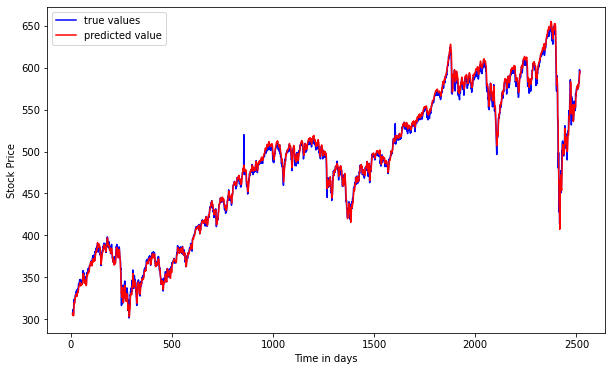

In [34]:
#visualizing the results
plt.figure(figsize=(10,6))#Set the figure size
plt.plot(time1[7:],y_test_window_set1,color='blue',label="true values")#Plot the true testing value in blue
plt.plot(time1[7:],predicted_value1,color='red',label='predicted value')#Plot the predicted value in red
plt.xlabel('Time in days')#set label of x as Time
plt.ylabel('Stock Price')#set label of y as Value
plt.legend()#show the labels
plt.show()#show the plot

* **x-axis** contains time in days.
* **y-axis** contains stock price
* From the visualization we can see that ,our model performed pretty well on the out of sample **NYSE** dataset .
* The **Blue** and **Red** line almost overlaps each other.
*It lags only in some extreme points which may be treated as outliers.

#**Prediction on Out of Samples dataset[Different Company]**

* So far,we have seen that our model has performed well on **different** stock market.
* Let us now see whether our model on different company having market cap **higher** than the microsoft
* **Apple** has market cap over 1.95 trillion. 

#**Prediction on Apple**

In [43]:
#Import the dataset from csv file.
data2=pd.read_csv('apple.csv',index_col='Date',parse_dates=['Date'])

In [44]:
x_t_scaled2=scaler.transform(data2)#scale the values using Robust Scaler

In [45]:
x_t2=[]#empty list
y_t2=[]#empty list

In [46]:
#here the features are first 7 days and output to be predicted is 8th day
for i in range(7,x_t_scaled2.shape[0]):#looping on the dataset for 7 days
  x_t2.append(x_t_scaled2[i-7:i])#appending first 7 days windowed list to x_t2 as features.
  y_t2.append(x_t_scaled2[i,0])#appending only the opening price of first 7 days windowed list to y_t1 as target labels.

In [47]:
#convert list into numpy array
x_test_window_set2,y_test_window_set2=np.array(x_t2),np.array(y_t2)

In [48]:
#predicted value on  dataset features
predicted_value2=model.predict(x_test_window_set2)

In [49]:
#calculating MAPE
m = tf.keras.metrics.MeanAbsolutePercentageError()#initialize the MAPE class.
m.update_state(y_test_window_set2,predicted_value2)#calculate MAPE on Actual testing values and forecasted values
m.result().numpy()#print the result.



6.9230475

In [50]:
time2=np.arange(1,data2.shape[0]+1)#create a range of numbers from 1 to total row count in the dataset

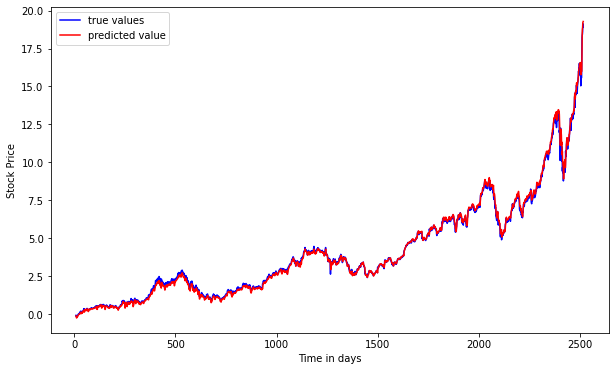

In [52]:
#visualizing the results
plt.figure(figsize=(10,6))#Set the figure size
plt.plot(time2[7:],y_test_window_set2,color='blue',label="true values")#Plot the true testing value in blue
plt.plot(time2[7:],predicted_value2,color='red',label='predicted value')#Plot the predicted value in red
plt.xlabel('Time in days')#set label of x as Time
plt.ylabel('Stock Price')#set label of y as Value
plt.legend()#show the labels
plt.show()#show the plot

* **x-axis** contains time in days.
* **y-axis** contains stock price
* The **Blue** and **Red** line almost overlaps each other.
* Hence ,from the visualization ,It is seen that our model trained on **Microsoft** stocks predict good even on **Apple** stocks.

#**Conclusion**

* Here we have trained CNN on  stock prices of one company[**Microsoft**] and predicted the prices of stock on different market **NYSE** and different company **Apple**.
* The lower **MAPE** and great **Visualization** plots prove that **CNN** models are good in predicting Stock market prices.